In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy import stats

In [5]:
%matplotlib inline

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

In [2]:
data = pd.read_csv('pines.txt', sep='\t')

In [3]:
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


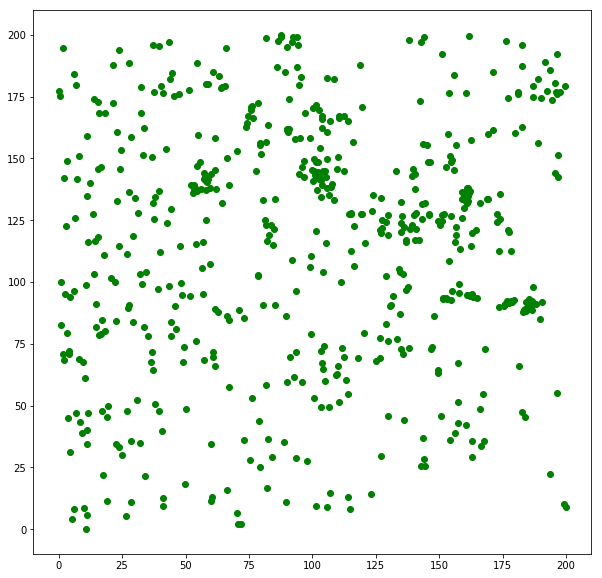

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(data.sn, data.we, c='green')
plt.show()

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате

In [46]:
#ret = stats.binned_statistic_2d(data.sn, data.we, None, statistic='count', bins=[np.arange(0,201,40), np.arange(0,201,40)])
observed = stats.binned_statistic_2d(data.sn, data.we, None, statistic='count', bins=5)
observed.statistic

C:\Users\d.v.kulemin.UTMN\AppData\Local\Programs\Python\Python37-32\lib\site-packages\scipy\stats\_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [30]:
mean_val = len(data)/25
mean_val

23.36

In [43]:
expected = np.zeros(25) + mean_val
expected

array([23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36])

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [51]:
#stats.chisquare(observed.statistic.ravel(), expected, ddof = 1)
stats.chisquare(observed.statistic.ravel(), ddof = 1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.87806178820889e-21)